# Import

In [9]:
import geopandas as gpd
# gpd.options.display_precision = 7
from geopandas import GeoDataFrame
from geopandas.tools import sjoin
from shapely.geometry import Point

import pandas as pd
pd.options.display.max_columns=100
pd.options.display.max_rows=200
import math

import os
import urllib.request
import zipfile
import io

import matplotlib.pyplot as plt
import matplotlib.cm as cmap
from matplotlib.colors import ListedColormap

import folium

import warnings
warnings.filterwarnings('ignore')

# Download SHP files

In [10]:
# function to retrieve the census data from IBGE
def retrieve_ibge_shp(state):
    # creating the folders
    os.makedirs(f'../data/{state}_Malha_Preliminar_2022', exist_ok=True)

    # url to download the data
    url = f'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2022/Agregados_por_Setores_Censitarios_preliminares/malha_com_atributos/setores/shp/UF/{state}/{state}_Malha_Preliminar_2022.zip'
    # defining the zip filename of the shapefile
    filename = f'{state}_Malha_Preliminar_2022.zip'

    # download the zip file
    urllib.request.urlretrieve(url, f'../data/{state}_Malha_Preliminar_2022/' + filename)

    # extracting all files inside the zip file
    z = zipfile.ZipFile(f'../data/{state}_Malha_Preliminar_2022/' + filename)
    z.extractall(path=f'../data/{state}_Malha_Preliminar_2022/')

    # delete the zip file after extracting
    os.remove(f'../data/{state}_Malha_Preliminar_2022/' + filename)

In [11]:
# using the function to retrieve the data from IBGE from North region
list_north_states = ['AC', 'AM']
for state in list_north_states:
    retrieve_ibge_shp(state)

# Download gpkg files

In [12]:
# function to retrieve the census data from IBGE
def retrieve_ibge_gpkg(state): 
    # creating the folders
    os.makedirs(f'../data/geopackage', exist_ok=True)
    print(f'Downloading {state} data...')
    # url to download the data
    url = f'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2022/Agregados_por_Setores_Censitarios_preliminares/malha_com_atributos/setores/gpkg/UF/{state}/{state}_Malha_Preliminar_2022.gpkg'
    # defining the filename of the geopackage
    filename = f'{state}_Malha_Preliminar_2022.gpkg'

    # download the file
    urllib.request.urlretrieve(url, f'../data/geopackage/' + filename)
    print(f'{state} data downloaded.')

In [13]:
# using the function to retrieve the data from IBGE from North region
list_north_states = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']
for state in list_north_states:
    retrieve_ibge_gpkg(state)

AC data downloaded.
AM data downloaded.
AP data downloaded.
PA data downloaded.
RO data downloaded.
RR data downloaded.
TO data downloaded.


# Open files

In [14]:
# GPKG file
state = 'PA'
# opening the shapefile of the state of Pará
filename = os.path.join('..', 'data', 'geopackage', f'{state}_Malha_Preliminar_2022.gpkg')
ibge = gpd.read_file(filename)

# print all cities in the state of Pará
print(ibge['NM_MUN'].unique())

['Abaetetuba' 'Abel Figueiredo' 'Acará' 'Afuá' 'Água Azul do Norte'
 'Alenquer' 'Almeirim' 'Altamira' 'Anajás' 'Ananindeua' 'Anapu'
 'Augusto Corrêa' 'Aurora do Pará' 'Aveiro' 'Bagre' 'Baião' 'Bannach'
 'Barcarena' 'Belém' 'Belterra' 'Benevides' 'Bom Jesus do Tocantins'
 'Bonito' 'Bragança' 'Brasil Novo' 'Brejo Grande do Araguaia'
 'Breu Branco' 'Breves' 'Bujaru' 'Cachoeira do Piriá' 'Cachoeira do Arari'
 'Cametá' 'Canaã dos Carajás' 'Capanema' 'Capitão Poço' 'Castanhal'
 'Chaves' 'Colares' 'Conceição do Araguaia' 'Concórdia do Pará'
 'Cumaru do Norte' 'Curionópolis' 'Curralinho' 'Curuá' 'Curuçá'
 'Dom Eliseu' 'Eldorado do Carajás' 'Faro' 'Floresta do Araguaia'
 'Garrafão do Norte' 'Goianésia do Pará' 'Gurupá' 'Igarapé-Açu'
 'Igarapé-Miri' 'Inhangapi' 'Ipixuna do Pará' 'Irituia' 'Itaituba'
 'Itupiranga' 'Jacareacanga' 'Jacundá' 'Juruti' 'Limoeiro do Ajuru'
 'Mãe do Rio' 'Magalhães Barata' 'Marabá' 'Maracanã' 'Marapanim'
 'Marituba' 'Medicilândia' 'Melgaço' 'Mocajuba' 'Moju' 'Mojuí dos 

In [15]:
pd.pivot_table(data=ibge.query('NM_MESO == "Metropolitana de Belém"'),
               index=['NM_REGIAO', 'NM_UF', 'NM_MESO', 'NM_MUN'],
               values='CD_SETOR', aggfunc='count')

CD_SETOR
NM_REGIAO NM_UF NM_MESO                NM_MUN                         
Norte     Pará  Metropolitana de Belém Ananindeua                  678
                                       Barcarena                   226
                                       Belém                      1839
                                       Benevides                   182
                                       Bujaru                       40
                                       Castanhal                   340
                                       Inhangapi                    26
                                       Marituba                    227
                                       Santa Bárbara do Pará        42
                                       Santa Izabel do Pará        109
                                       Santo Antônio do Tauá        55

In [16]:
# create a df with only the city of Belem
belem = ibge.query('NM_MUN == "Belém"')
print('size of the df: ', belem.shape)
belem.head(3)

size of the df:  (1839, 30)


CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF NM_UF   CD_MUN  \
2387  150140205000001P  0.043940         1     Norte    15  Pará  1501402   
2388  150140205000002P  0.057221         1     Norte    15  Pará  1501402   
2389  150140205000004P  0.057701         1     Norte    15  Pará  1501402   

     NM_MUN    CD_DIST NM_DIST   CD_SUBDIST NM_SUBDIST CD_MICRO NM_MICRO  \
2387  Belém  150140205   Belém  15014020500       None    15007    Belém   
2388  Belém  150140205   Belém  15014020500       None    15007    Belém   
2389  Belém  150140205   Belém  15014020500       None    15007    Belém   

     CD_MESO                 NM_MESO  CD_RGI NM_RGI CD_RGINT NM_RGINT  \
2387    1503  Metropolitana de Belém  150001  Belém     1501    Belém   
2388    1503  Metropolitana de Belém  150001  Belém     1501    Belém   
2389    1503  Metropolitana de Belém  150001  Belém     1501    Belém   

     CD_CONCURB NM_CONCURB v0001 v0002 v0003 v0004     v0005      v0006 v0007  \
2387    1501402   Belém/PA   932   393   393     0  2.678161  11.494253   348   
2388    1501402   Belém/PA  1244   489   489     0  2.808126  22.799097   443   
2389    1501402   Belém/PA  1185   434   434     0  2.969925  29.072682   399   

                                               geometry  
2387  POLYGON ((-48.48613 -1.45975, -48.48697 -1.459...  
2388  POLYGON ((-48.48525 -1.46209, -48.48527 -1.462...  
2389  POLYGON ((-48.48432 -1.46340, -48.48466 -1.463...

In [17]:
print('CD_SETOR: ', belem['CD_SETOR'].unique().shape[0])
print('CD_REGIAO: ', belem['CD_REGIAO'].unique().shape[0])
print('CD_UF: ', belem['CD_UF'].unique().shape[0])
print('CD_MUN: ', belem['CD_MUN'].unique().shape[0])
print('CD_DIST: ', belem['CD_DIST'].unique().shape[0])
print('CD_SUBDIST: ', belem['CD_SUBDIST'].unique().shape[0])
print('CD_MICRO: ', belem['CD_MICRO'].unique().shape[0])
print('CD_MESO: ', belem['CD_MESO'].unique().shape[0])
print('CD_RGI: ', belem['CD_RGI'].unique().shape[0])
print('CD_RGINT: ', belem['CD_RGINT'].unique().shape[0])
print('CD_CONCURB: ', belem['CD_CONCURB'].unique().shape[0])

CD_SETOR:  1823
CD_REGIAO:  1
CD_UF:  1
CD_MUN:  1
CD_DIST:  8
CD_SUBDIST:  8
CD_MICRO:  1
CD_MESO:  1
CD_RGI:  1
CD_RGINT:  1
CD_CONCURB:  1


In [18]:
# rename the columns with more meaningful names
belem.rename(columns={'v0001': 'NR_PESSOAS_V0001',
                      'v0002': 'NR_DOMICILIOS_V0002'}, inplace=True)
# select only the columns that we are interested in
belem = belem [['CD_SETOR', 'CD_DIST', 'NM_DIST', 'NR_PESSOAS_V0001', 'NR_DOMICILIOS_V0002', 'NM_UF', 'NM_MUN', 'geometry']]
belem.head()

CD_SETOR    CD_DIST NM_DIST NR_PESSOAS_V0001  \
2387  150140205000001P  150140205   Belém              932   
2388  150140205000002P  150140205   Belém             1244   
2389  150140205000004P  150140205   Belém             1185   
2390  150140205000005P  150140205   Belém              904   
2391  150140205000006P  150140205   Belém              826   

     NR_DOMICILIOS_V0002 NM_UF NM_MUN  \
2387                 393  Pará  Belém   
2388                 489  Pará  Belém   
2389                 434  Pará  Belém   
2390                 365  Pará  Belém   
2391                 361  Pará  Belém   

                                               geometry  
2387  POLYGON ((-48.48613 -1.45975, -48.48697 -1.459...  
2388  POLYGON ((-48.48525 -1.46209, -48.48527 -1.462...  
2389  POLYGON ((-48.48432 -1.46340, -48.48466 -1.463...  
2390  POLYGON ((-48.48742 -1.46489, -48.48840 -1.466...  
2391  POLYGON ((-48.48659 -1.46375, -48.48678 -1.464...

In [19]:
belem.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1839 entries, 2387 to 4225
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CD_SETOR             1839 non-null   object  
 1   CD_DIST              1839 non-null   object  
 2   NM_DIST              1839 non-null   object  
 3   NR_PESSOAS_V0001     1839 non-null   object  
 4   NR_DOMICILIOS_V0002  1839 non-null   object  
 5   NM_UF                1839 non-null   object  
 6   NM_MUN               1839 non-null   object  
 7   geometry             1839 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 129.3+ KB


In [20]:
# format the columns - numeric
belem['NR_PESSOAS_V0001'] = belem['NR_PESSOAS_V0001'].astype(int)
belem['NR_DOMICILIOS_V0002'] = belem['NR_DOMICILIOS_V0002'].astype(int)

# create a new column with the population per household
belem['TX_POP_HOUSEHOLD'] = belem['NR_PESSOAS_V0001'] / belem['NR_DOMICILIOS_V0002']

In [21]:
belem.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1839 entries, 2387 to 4225
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CD_SETOR             1839 non-null   object  
 1   CD_DIST              1839 non-null   object  
 2   NM_DIST              1839 non-null   object  
 3   NR_PESSOAS_V0001     1839 non-null   int64   
 4   NR_DOMICILIOS_V0002  1839 non-null   int64   
 5   NM_UF                1839 non-null   object  
 6   NM_MUN               1839 non-null   object  
 7   geometry             1839 non-null   geometry
 8   TX_POP_HOUSEHOLD     1818 non-null   float64 
dtypes: float64(1), geometry(1), int64(2), object(5)
memory usage: 143.7+ KB


<Axes: >

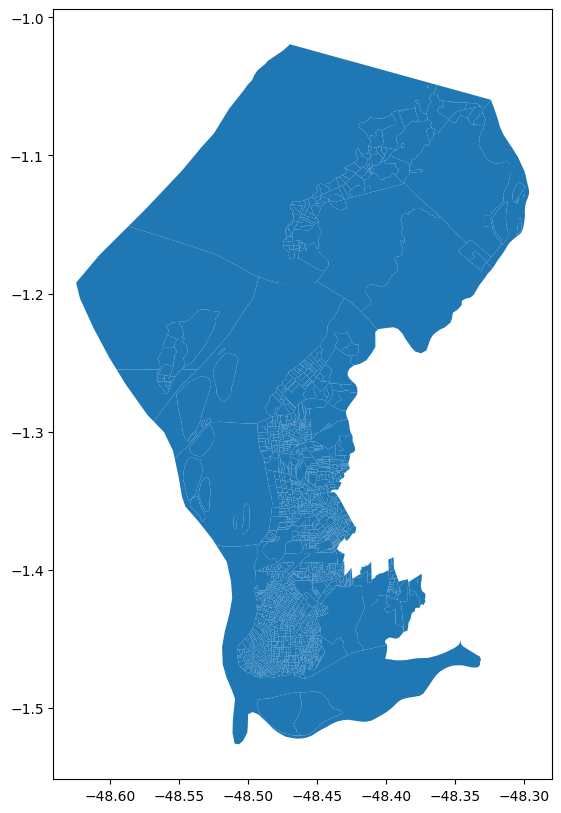

In [22]:
# simple plot of the city of Belem
fig, ax = plt.subplots(figsize=(10, 10))
belem.plot(ax=ax)

Geopackage files typically contain a column named “geometry,” recognized by GeoPandas as representing the shape of areas or points.

# Plotting maps

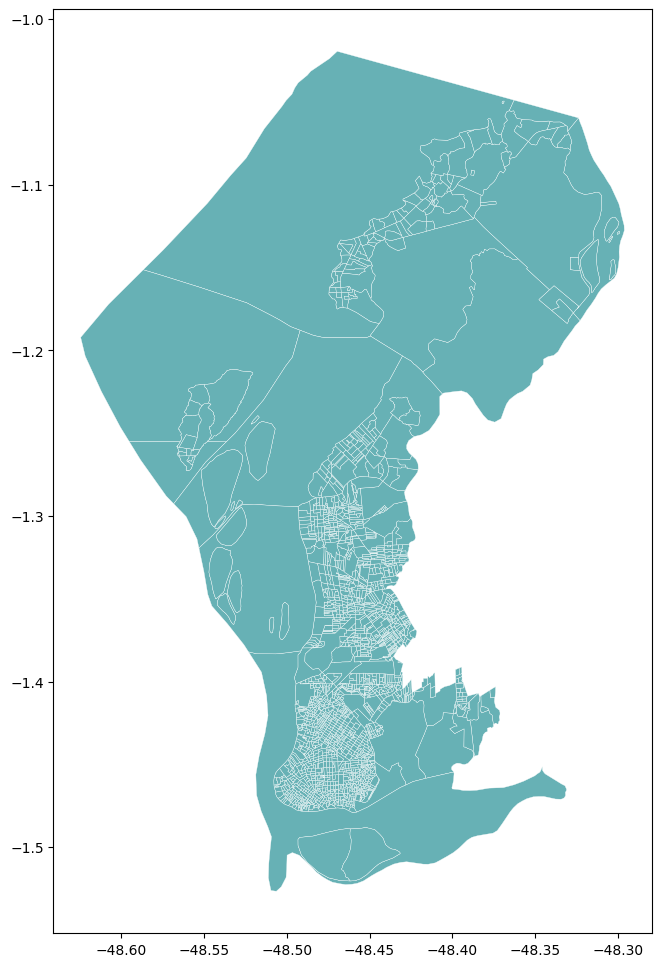

In [23]:
# First plot of the df of Lisbon

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

belem.plot(aspect=1,
            edgecolor="white",
            linewidth=0.25,
            color='#67B1B5',
            ax=ax);

In [24]:
belem.explore()

In [25]:
# plot folium map
m = folium.Map(location=[-1.3, -48.503], zoom_start=11, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': 'blue',
    'color': 'black',
    'weight': 0.5,
    'fillOpacity': 0.5,
}


folium.GeoJson(belem,
               style_function=style_function,
               popup=folium.GeoJsonPopup(fields=['NM_DIST', 'NR_PESSOAS_V0001', 'NR_DOMICILIOS_V0002', 'TX_POP_HOUSEHOLD']),
               popup_keep_highlighted=True).add_to(m)

m


## Aggregate areas to the statistical section

In [26]:
belem['NM_DIST'].unique()

array(['Belém', 'Bengui', 'Entroncamento', 'Guamá', 'Icoaraci',
       'Mosqueiro', 'Outeiro', 'Sacramenta'], dtype=object)

In [27]:
# aggregate the data by districts
belem_dist = belem[['CD_DIST',
                    'NM_DIST',
                    'NR_PESSOAS_V0001',
                    'NR_DOMICILIOS_V0002',
                    'NM_UF',
                    'NM_MUN',
                    'geometry']].dissolve(by='CD_DIST',
                                          aggfunc={'NM_DIST': 'first',
                                                   'NR_PESSOAS_V0001': 'sum',
                                                   'NR_DOMICILIOS_V0002': 'sum',
                                                   'NM_UF': 'first',
                                                   'NM_MUN': 'first'}).reset_index()

belem_dist['TX_POP_HOUSEHOLD'] = belem_dist['NR_PESSOAS_V0001'] / belem_dist['NR_DOMICILIOS_V0002']

print('shape of bh_statistical_section: ', belem_dist.shape)

shape of bh_statistical_section:  (8, 8)


In [28]:
belem_dist

CD_DIST                                           geometry  \
0  150140205  POLYGON ((-48.50686 -1.46609, -48.50744 -1.464...   
1  150140245  POLYGON ((-48.49051 -1.37947, -48.48845 -1.377...   
2  150140250  POLYGON ((-48.45311 -1.46873, -48.45334 -1.468...   
3  150140255  POLYGON ((-48.49182 -1.47808, -48.49310 -1.477...   
4  150140260  POLYGON ((-48.48396 -1.32149, -48.48457 -1.322...   
5  150140265  POLYGON ((-48.45194 -1.19240, -48.47711 -1.192...   
6  150140267  POLYGON ((-48.57276 -1.28795, -48.58824 -1.266...   
7  150140275  POLYGON ((-48.49049 -1.43214, -48.49055 -1.432...   

         NM_DIST  NR_PESSOAS_V0001  NR_DOMICILIOS_V0002 NM_UF NM_MUN  \
0          Belém            140032                60525  Pará  Belém   
1         Bengui            275689               108043  Pará  Belém   
2  Entroncamento            123823                48346  Pará  Belém   
3          Guamá            283619               104872  Pará  Belém   
4       Icoaraci            171529                68727  Pará  Belém   
5      Mosqueiro             41647                34010  Pará  Belém   
6        Outeiro             43845                21864  Pará  Belém   
7     Sacramenta            230846                86412  Pará  Belém   

   TX_POP_HOUSEHOLD  
0          2.313622  
1          2.551660  
2          2.561184  
3          2.704430  
4          2.495802  
5          1.224552  
6          2.005351  
7          2.671458

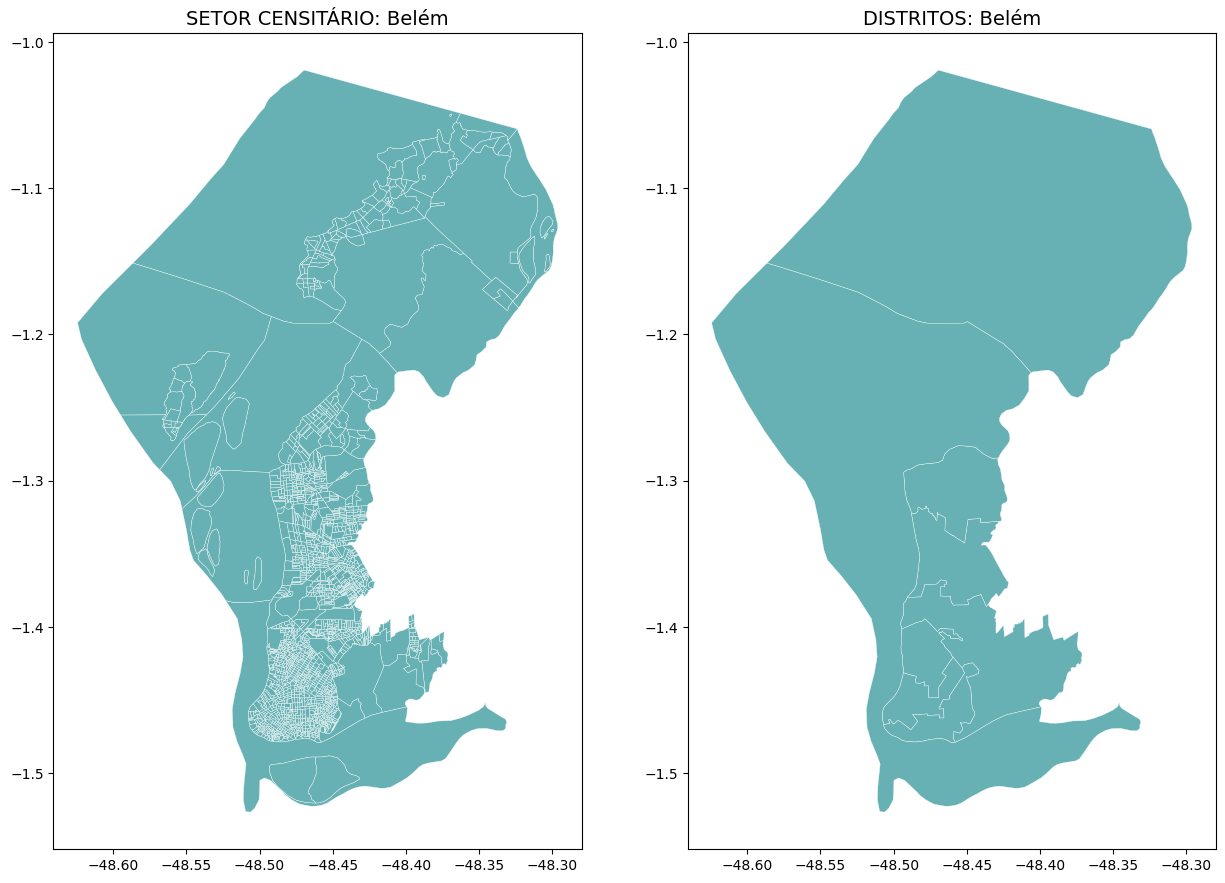

In [29]:
# Plot the aggregated areas

fig, ax = plt.subplots(1, 2, figsize=(15, 12))

belem.plot(aspect=1,
        edgecolor="white",
        linewidth=0.25,
        color='#67B1B5',
        ax=ax[0])

ax[0].set_title('SETOR CENSITÁRIO: Belém', fontsize=14)

belem_dist.plot(aspect=1,
                edgecolor="white",
                linewidth=0.25,
                color='#67B1B5',
                ax=ax[1])

ax[1].set_title('DISTRITOS: Belém', fontsize=14);

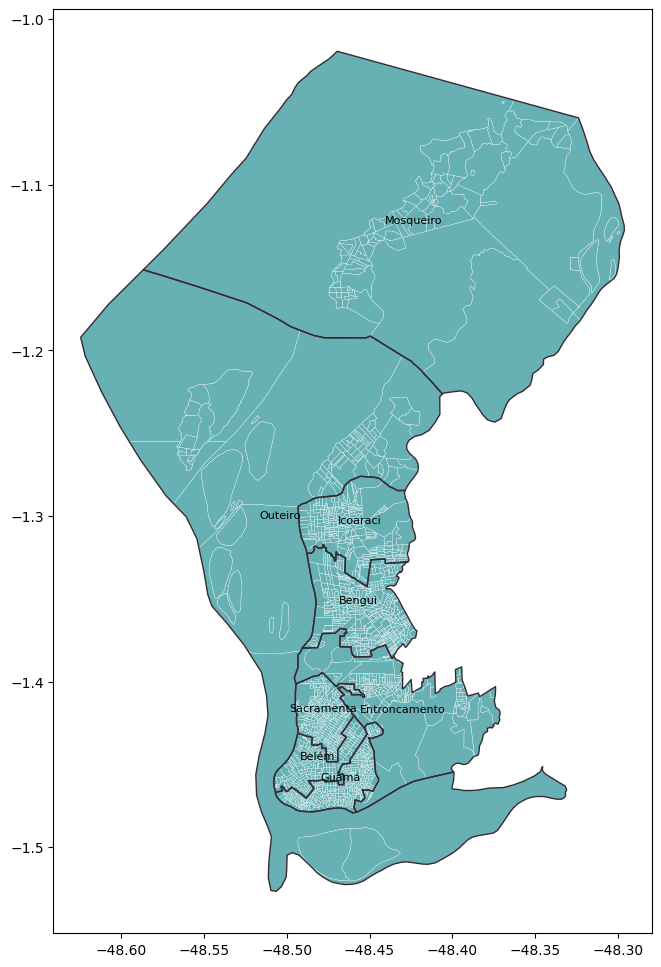

In [30]:
# Plot all aggregations in the same map

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

belem.plot(aspect=1,
        edgecolor="white",
        linewidth=0.2,
        color='#67B1B5',
        ax=ax)

belem_dist.plot(aspect=1,
             edgecolor="#372932",
             linewidth=1,
             facecolor="none",
             ax=ax)

for point, lat, long in zip(belem_dist['NM_DIST'], belem_dist['geometry'].centroid.y, belem_dist['geometry'].centroid.x):
    # print(point, lat, long)
    plt.text(long, lat, point,
             fontsize=8, verticalalignment='bottom', horizontalalignment='center');

## Plot maps with a column value

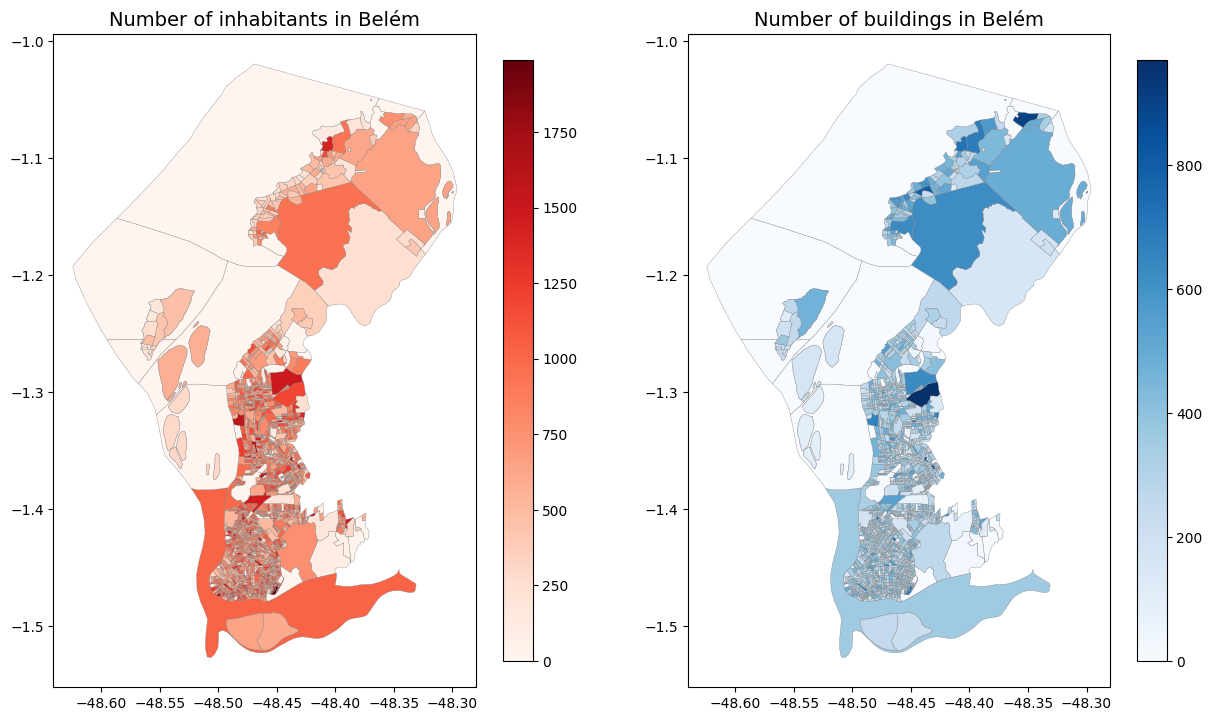

In [31]:
# plot the maps with the legend as the columns values

fig, ax = plt.subplots(1, 2, figsize=(15, 12))

belem.plot(aspect=1,
        column='NR_PESSOAS_V0001',
        edgecolor="gray",
        linewidth=0.25,
        cmap='Reds',
        legend_kwds={'shrink': 0.65},
        legend=True,
        ax=ax[0])
ax[0].set_title('Number of inhabitants in Belém', fontsize=14)

belem.plot(aspect=1,
        column='NR_DOMICILIOS_V0002',
        edgecolor="gray",
        linewidth=0.25,
        cmap='Blues',
        legend_kwds={'shrink': 0.65},
        legend=True,
        ax=ax[1])
ax[1].set_title('Number of buildings in Belém', fontsize=14);

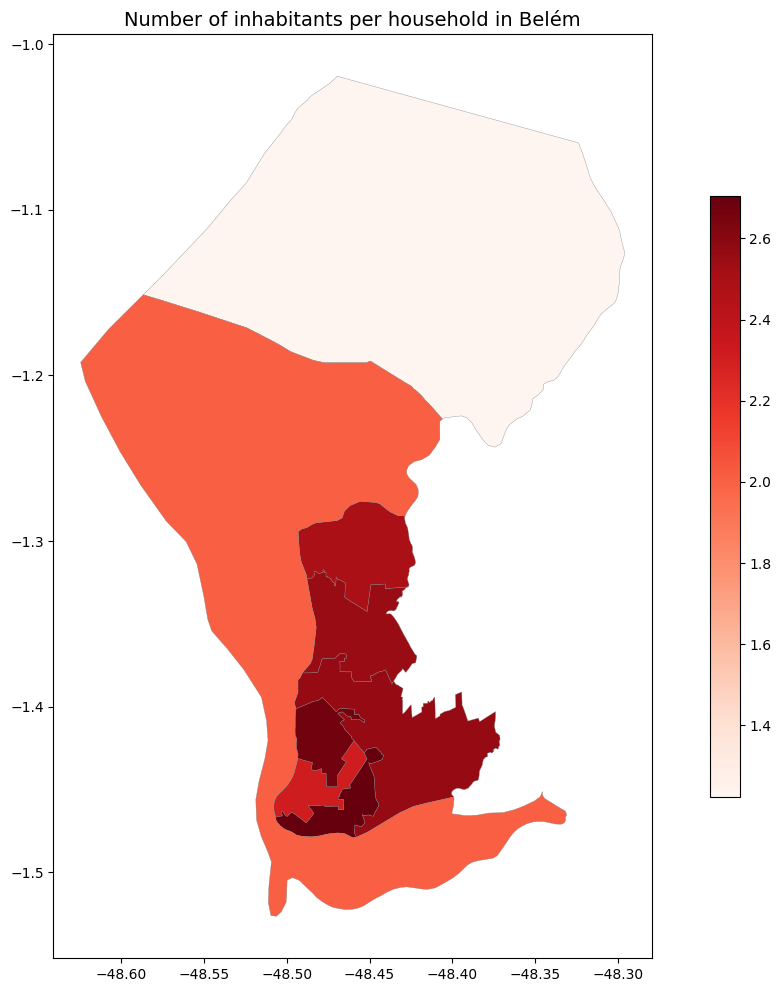

In [32]:
# plot the maps with the legend as the columns values

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

belem_dist.plot(aspect=1,
        column='TX_POP_HOUSEHOLD',
        edgecolor="gray",
        linewidth=0.25,
        cmap='Reds',
        legend_kwds={'shrink': 0.65},
        legend=True,
        ax=ax)
ax.set_title('Number of inhabitants per household in Belém', fontsize=14);

# Calculating geometric features

In [33]:
# check the Coordinate Reference System (CRS) before applying calculations
belem.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
# convert the crs to 5880 - metres
belem_5880 = belem.to_crs(epsg=5880)
belem_5880.crs

<Projected CRS: EPSG:5880>
Name: SIRGAS 2000 / Brazil Polyconic
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - onshore and offshore. Includes Rocas, Fernando de Noronha archipelago, Trindade, Ihlas Martim Vaz and Sao Pedro e Sao Paulo.
- bounds: (-74.01, -35.71, -25.28, 7.04)
Coordinate Operation:
- name: Brazil Polyconic
- method: American Polyconic
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

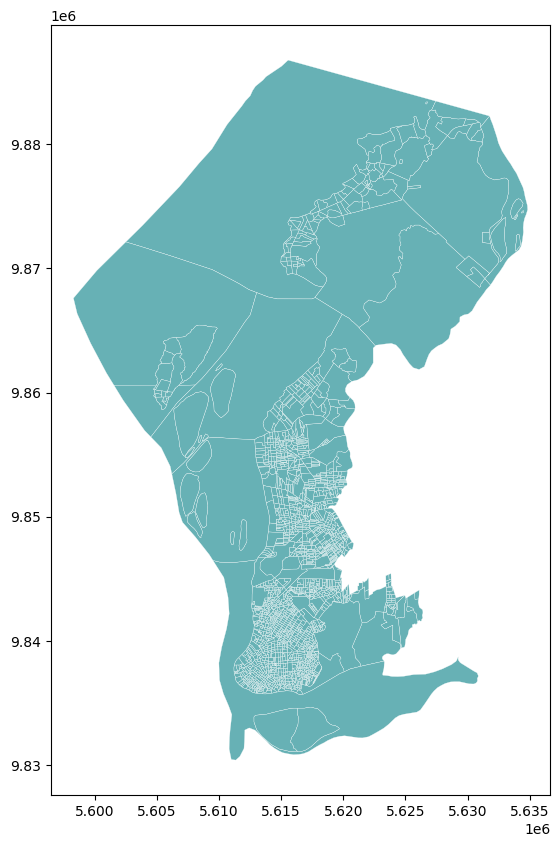

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

belem_5880.plot(aspect=1,
        edgecolor="white",
        linewidth=0.2,
        color='#67B1B5',
        ax=ax);


## Area

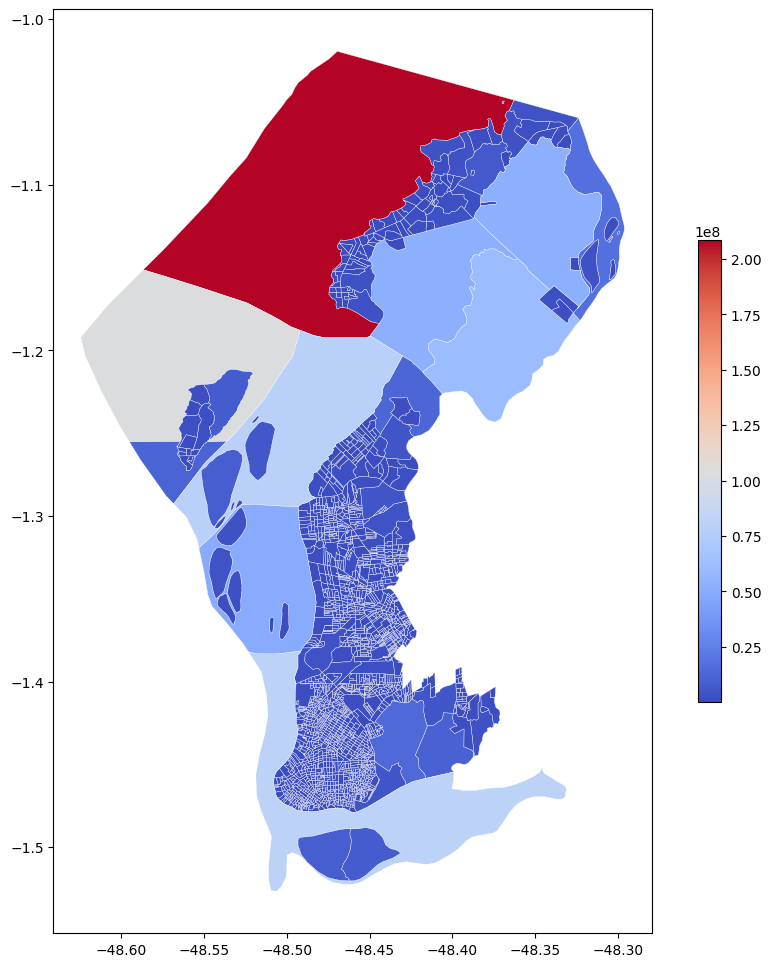

In [36]:
# geometric features need to be calculated before crs transformation
belem['area_m2'] = belem_5880['geometry'].area

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

belem.plot(aspect=1,
           column='area_m2',
           edgecolor="white",
           linewidth=0.25,
           cmap='coolwarm',
           legend_kwds={'shrink': 0.5},
           legend=True,
           ax=ax);

## Centroid

In [37]:
# separate a df with only the statistical section id and centroid. The geodataframe does not support two geometries
belem_centroid = belem_5880[['CD_SETOR', 'geometry']]
belem_centroid['centroid'] = belem_centroid['geometry'].centroid

#drop geometry
belem_centroid.drop(['geometry'], axis=1, inplace=True)

# rename the centroid column as geometry, this column will be used on plots
belem_centroid.rename(columns={'centroid': 'geometry'}, inplace=True)

belem_centroid.head()

CD_SETOR                         geometry
2387  150140205000001P  POINT (5613455.566 9837854.174)
2388  150140205000002P  POINT (5613546.163 9837626.436)
2389  150140205000004P  POINT (5613631.882 9837368.911)
2390  150140205000005P  POINT (5613341.408 9837249.853)
2391  150140205000006P  POINT (5613382.711 9837420.746)

In [38]:
# convert the crs to 4674 - lat/long
belem_centroid = belem_centroid.to_crs(epsg=4674)

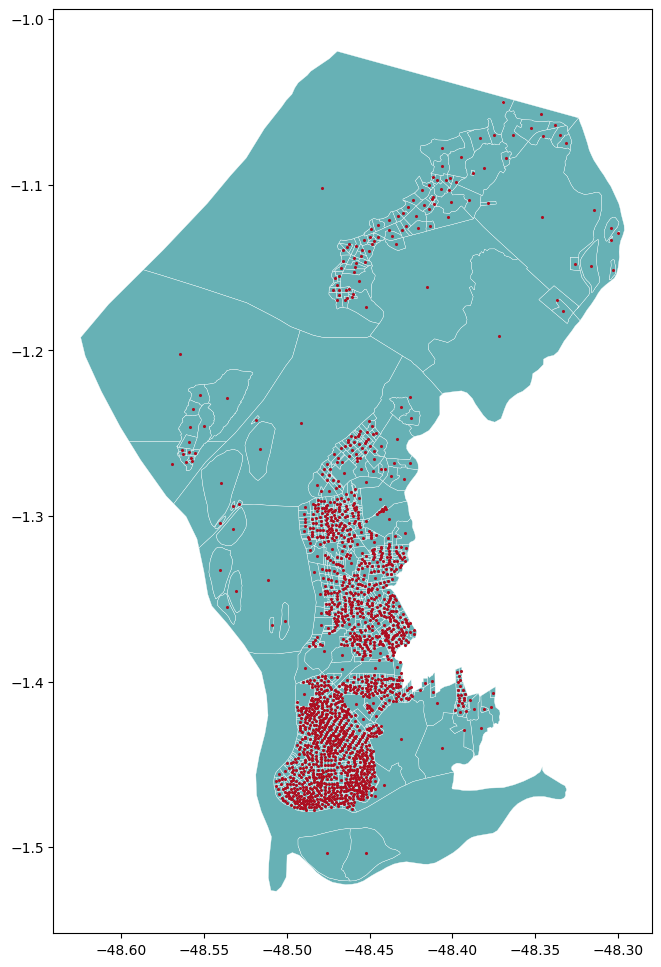

In [39]:
# Plot the centroids of the statistical sections

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

belem.plot(aspect=1,
           edgecolor="white",
           linewidth=0.25,
           color='#67B1B5',
           ax=ax)

belem_centroid.plot(aspect=1,
                    color='#AD0E20',
                    markersize=1.5,
                    ax=ax);

# Allocating Points to Polygons
A common geospatial data task is assigning a coordinate point to a polygon. There are different approaches to this, such as:

- Allocating the point to the corresponding polygon
- Allocating the point to the polygon with the closest centroid

In [45]:
# create random points
dict_points = {'id_point': ['001', '002', '003'],
          'latitude': [-1.457, -1.4582, -1.4548],
          'longitude': [-48.4958, -48.4882, -48.4902]
        }

#allocate the points into a pandas df
points = pd.DataFrame(dict_points)

# transform this pandas df to geopandas with geometry
# create a columns with point geometry
geometry = [Point(xy) for xy in zip(points['longitude'], points['latitude'])]

points_geo = GeoDataFrame(points, crs="EPSG:4674", geometry=geometry)

points_geo

id_point  latitude  longitude                    geometry
0      001   -1.4570   -48.4958  POINT (-48.49580 -1.45700)
1      002   -1.4582   -48.4882  POINT (-48.48820 -1.45820)
2      003   -1.4548   -48.4902  POINT (-48.49020 -1.45480)

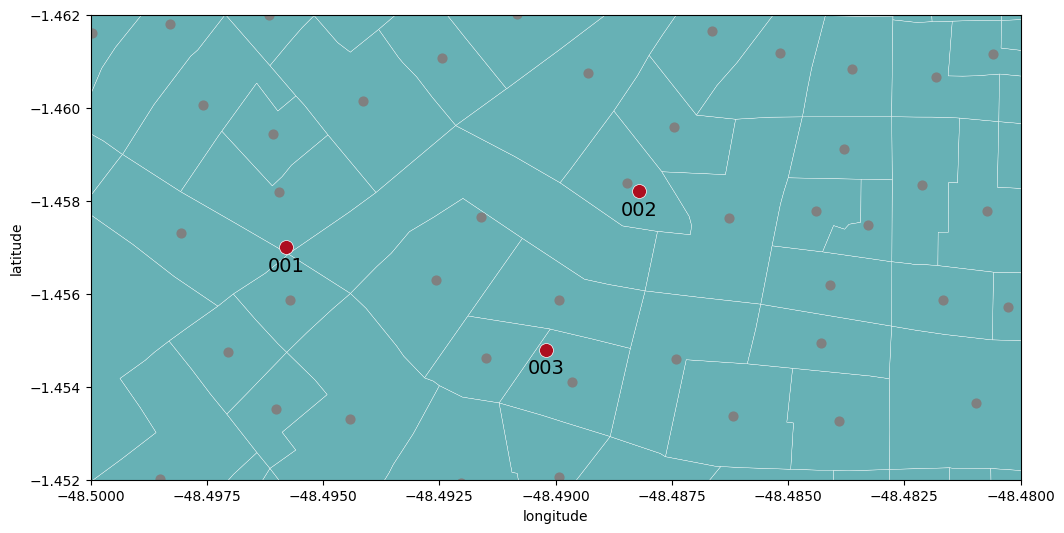

In [46]:
# Plot the created points
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

belem.plot(aspect=1,
           edgecolor="white",
           linewidth=0.25,
           color='#67B1B5',
           ax=ax)

belem_centroid.plot(aspect=1,
                    color='gray',
                    markersize=40,
                    ax=ax)

points_geo.plot(aspect=1,
                color='#AD0E20',
                markersize=100,
                linewidth=0.5,
                edgecolor="white",
                ax=ax)

for point, lat, long in zip(points_geo['id_point'], points_geo['latitude'], points_geo['longitude']):
    plt.text(long, lat+0.0006, point,
             fontsize=14, verticalalignment='bottom', horizontalalignment='center')

ax.set_xlim(-48.50,-48.48)
ax.set_ylim(-1.452,-1.462)

ax.set_xlabel('longitude')
ax.set_ylabel('latitude');

## Using Spatial Joins

In [47]:
# inner join to find correspondent area of a poin
join_inner_df = sjoin(belem, points_geo, how="inner")

# format the df of random points to indicate the ID of the corresponding statistical section
points_geo = points_geo.merge(join_inner_df[['id_point', 'CD_SETOR']], how='left', on='id_point')

points_geo

id_point  latitude  longitude                    geometry          CD_SETOR
0      001   -1.4570   -48.4958  POINT (-48.49580 -1.45700)  150140205000013P
1      002   -1.4582   -48.4882  POINT (-48.48820 -1.45820)  150140205000016P
2      003   -1.4548   -48.4902  POINT (-48.49020 -1.45480)  150140205000070P

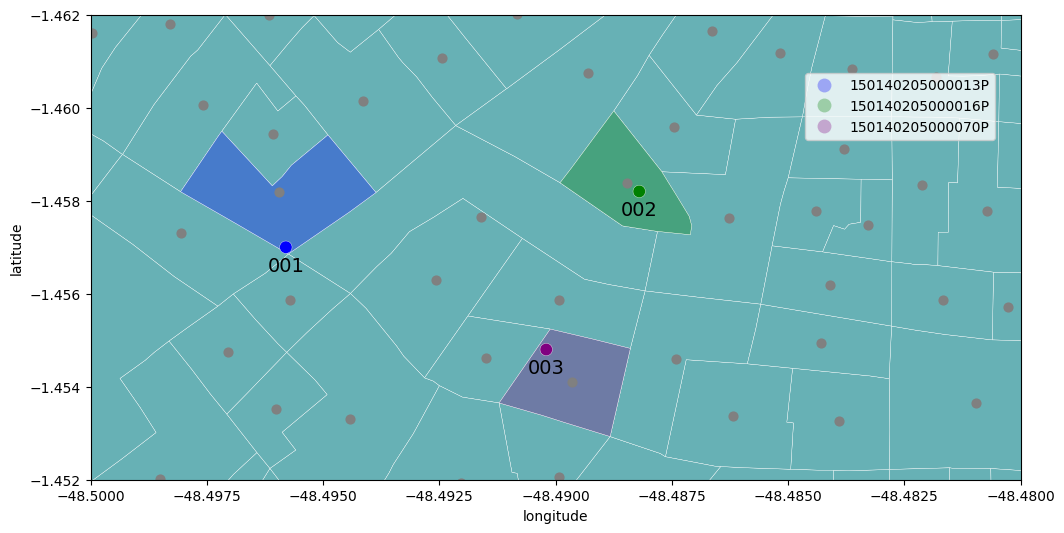

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

belem.plot(aspect=1,
           edgecolor="white",
           linewidth=0.25,
           color='#67B1B5',
           ax=ax)

colors = {'150140205000013P':'blue', '150140205000016P':'red',
          '150140205000043P':'green', '150140205000070P':'purple'}

join_inner_df.loc[belem['CD_SETOR'].isin(points_geo['CD_SETOR'].tolist())].plot(aspect=1,
                                                                                column='CD_SETOR',
                                                                                edgecolor="white",
                                                                                linewidth=0.25,
                                                                                cmap=ListedColormap(list(colors.values())),
                                                                                alpha=0.3,
                                                                                ax=ax,
                                                                                legend=True)

belem_centroid.plot(aspect=1,
                    color='gray',
                    markersize=40,
                    ax=ax)

points_geo.plot(aspect=1,
                column='CD_SETOR',
                cmap=ListedColormap(list(colors.values())),
                markersize=80,
                linewidth=0.25,
                edgecolor="white",
                ax=ax)

for point, lat, long in zip(points_geo['id_point'], points_geo['latitude'], points_geo['longitude']):
    plt.text(long, lat+0.0006, point,
             fontsize=14, verticalalignment='bottom', horizontalalignment='center')

# change positon of the legend to the top right inside 
ax.get_legend().set_bbox_to_anchor((0.98, 0.89))

ax.set_xlim(-48.50,-48.48)
ax.set_ylim(-1.452,-1.462)

ax.set_xlabel('longitude')
ax.set_ylabel('latitude');

## Loop to find closest centroid

In [49]:
# create separate columns with latitude and longitude from centroids
belem_centroid['centroid_latitude'] = belem_centroid['geometry'].y
belem_centroid['centroid_longitude'] = belem_centroid['geometry'].x

belem_centroid.head(3)

CD_SETOR                    geometry  centroid_latitude  \
2387  150140205000001P  POINT (-48.48745 -1.45960)          -1.459596   
2388  150140205000002P  POINT (-48.48663 -1.46164)          -1.461644   
2389  150140205000004P  POINT (-48.48586 -1.46396)          -1.463960   

      centroid_longitude  
2387          -48.487453  
2388          -48.486634  
2389          -48.485858

In [50]:
# loop to find closest DTMNFRSEC21 using centroid

# create a tuple of (lat, long)
belem_centroid['centroid'] = list(zip(belem_centroid['centroid_latitude'].round(4), belem_centroid['centroid_longitude'].round(4)))
points_geo['point'] = list(zip(points_geo['latitude'].round(4), points_geo['longitude'].round(4)))

# create a dict with DTMNFRSEC21 and centroid
sec_centroid = dict(zip(belem_centroid['CD_SETOR'], belem_centroid['centroid']))
point_coord = dict(zip(points_geo['id_point'], points_geo['point']))

# empty dict to save information
closest_id = dict()

for id_point, point in point_coord.items():
    distance = dict()
    for sec, centroid in sec_centroid.items():
        distance[f'{sec}'] = math.dist(point, centroid)
    
    # print(min(distance.values()))
    min_id = min(distance, key=distance.get)
    closest_id[f'{id_point}'] = min_id

closest_id

{'001': '150140205000043P',
 '002': '150140205000016P',
 '003': '150140205000070P'}

In [51]:
points_geo['closest_sec'] = points_geo['id_point'].map(closest_id)
points_geo

id_point  latitude  longitude                    geometry          CD_SETOR  \
0      001   -1.4570   -48.4958  POINT (-48.49580 -1.45700)  150140205000013P   
1      002   -1.4582   -48.4882  POINT (-48.48820 -1.45820)  150140205000016P   
2      003   -1.4548   -48.4902  POINT (-48.49020 -1.45480)  150140205000070P   

                 point       closest_sec  
0   (-1.457, -48.4958)  150140205000043P  
1  (-1.4582, -48.4882)  150140205000016P  
2  (-1.4548, -48.4902)  150140205000070P

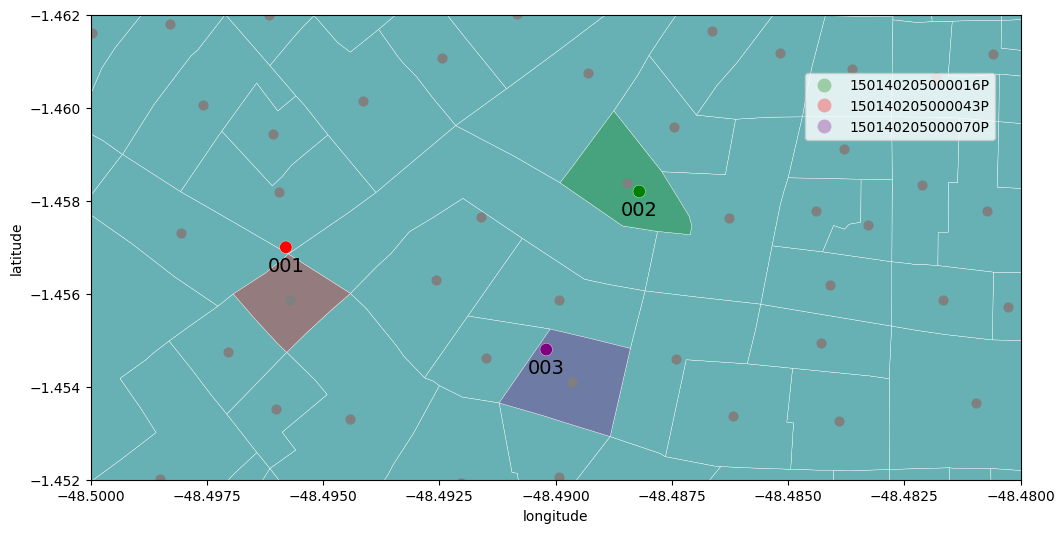

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

belem.plot(aspect=1,
           edgecolor="white",
           linewidth=0.25,
           color='#67B1B5',
           ax=ax)

colors = {'150140205000013P':'green', '150140205000016P':'red',
          '150140205000043P':'red', '150140205000070P':'purple'}

(belem.loc[belem['CD_SETOR']
            .isin(points_geo['closest_sec']
            .tolist())].plot(aspect=1,  
                             column='CD_SETOR',
                             edgecolor="white",
                             linewidth=0.25,
                             cmap=ListedColormap(list(colors.values())),
                             alpha=0.3,
                             ax=ax,
                             legend=True
                        )
)

belem_centroid.plot(aspect=1,
                    color='gray',
                    markersize=40,
                    ax=ax)

points_geo.plot(aspect=1,
                column='closest_sec',
                cmap=ListedColormap(list(colors.values())),
                markersize=80,
                linewidth=0.25,
                edgecolor="white",
                ax=ax)

for point, lat, long in zip(points_geo['id_point'], points_geo['latitude'], points_geo['longitude']):
    plt.text(long, lat+0.0006, point,
             fontsize=14, verticalalignment='bottom', horizontalalignment='center')

ax.set_xlim(-48.50,-48.48)
ax.set_ylim(-1.452,-1.462)

# change positon of the legend to the top right inside 
ax.get_legend().set_bbox_to_anchor((0.98, 0.89))

ax.set_xlabel('longitude')
ax.set_ylabel('latitude');

# Saving files

In [53]:
join_inner_df

CD_SETOR    CD_DIST NM_DIST  NR_PESSOAS_V0001  \
2397  150140205000013P  150140205   Belém               289   
2400  150140205000016P  150140205   Belém               858   
2448  150140205000070P  150140205   Belém               603   

      NR_DOMICILIOS_V0002 NM_UF NM_MUN  \
2397                  144  Pará  Belém   
2400                  425  Pará  Belém   
2448                  277  Pará  Belém   

                                               geometry  TX_POP_HOUSEHOLD  \
2397  POLYGON ((-48.49386 -1.45817, -48.49489 -1.459...          2.006944   
2400  POLYGON ((-48.48771 -1.45862, -48.48875 -1.459...          2.018824   
2448  POLYGON ((-48.48839 -1.45482, -48.48920 -1.455...          2.176895   

           area_m2  index_right id_point  latitude  longitude  
2397  69930.037395            0      001   -1.4570   -48.4958  
2400  46726.174513            1      002   -1.4582   -48.4882  
2448  49568.655848            2      003   -1.4548   -48.4902

In [54]:
# creating the folders
os.makedirs(f'../data/output', exist_ok=True)

join_inner_df.to_file('../data/output/belem_processed.gpkg', driver='GPKG')
join_inner_df.to_file('../data/output/belem_processed.json', driver='GeoJSON')

# Create a function to automate the process and save a file for each city of Belém district

In [55]:
pd.pivot_table(data=ibge.query('NM_MESO == "Metropolitana de Belém"'),
               index=['NM_REGIAO', 'NM_UF', 'NM_MESO', 'NM_MUN'],
               values='CD_SETOR', aggfunc='count')

CD_SETOR
NM_REGIAO NM_UF NM_MESO                NM_MUN                         
Norte     Pará  Metropolitana de Belém Ananindeua                  678
                                       Barcarena                   226
                                       Belém                      1839
                                       Benevides                   182
                                       Bujaru                       40
                                       Castanhal                   340
                                       Inhangapi                    26
                                       Marituba                    227
                                       Santa Bárbara do Pará        42
                                       Santa Izabel do Pará        109
                                       Santo Antônio do Tauá        55

In [56]:
def format_city(state, region):
    print('Processing the data...')
    gdf = gpd.read_file(f'../data/geopackage/{state}_Malha_Preliminar_2022.gpkg')
    
    # filter the district
    gdf = gdf.query(f'NM_MESO == "{region}"').reset_index(drop=True)

    # select only the columns that we are interested in
    gdf = gdf[['CD_SETOR', 'CD_DIST', 'NM_DIST', 'CD_CONCURB', 'NM_CONCURB', 'CD_MUN', 'NM_MUN',
                'CD_UF', 'NM_UF', 'v0001', 'v0002',  'geometry']]
    
    # rename the columns with more meaningful names
    gdf.rename(columns={
        'CD_SETOR': 'CD_SETOR_CENSITARIO',
        'CD_DIST': 'CD_DISTRITO',
        'NM_DIST': 'NM_DISTRITO',
        'CD_CONCURB': 'CD_CONCENTRACAO_URBANA',
        'NM_CONCURB': 'NM_CONCENTRACAO_URBANA',
        'v0001': 'NR_PESSOAS_V0001',
        'v0002': 'NR_DOMICILIOS_V0002',
        'CD_MUN': 'CD_MUNICIPIO',
        'NM_MUN': 'NM_MUNICIPIO',
        'CD_UF': 'CD_UF',
        'NM_UF': 'NM_UF'        
        }, inplace=True)
    
    # format the columns - numeric
    gdf['NR_PESSOAS_V0001'] = gdf['NR_PESSOAS_V0001'].astype(int)
    gdf['NR_DOMICILIOS_V0002'] = gdf['NR_DOMICILIOS_V0002'].astype(int)

    for city in gdf['NM_MUNICIPIO'].unique():
        print(f'Processing the city of {city}...')
        gdf_city = gdf.query(f'NM_MUNICIPIO == "{city}"')

        # create a gdf with the NM_DIST
        gdf_dist = gdf_city[['CD_DISTRITO',
                             'NM_DISTRITO',
                             'CD_MUNICIPIO',
                             'NM_MUNICIPIO',
                             'CD_UF',
                             'NM_UF',
                             'NR_PESSOAS_V0001',
                             'NR_DOMICILIOS_V0002',
                             'geometry']].dissolve(by='CD_DISTRITO',
                                                   aggfunc={
                                                       'NM_DISTRITO': 'first',
                                                       'CD_MUNICIPIO': 'first',
                                                       'NM_MUNICIPIO': 'first',
                                                       'CD_UF': 'first',
                                                       'NM_UF': 'first',
                                                       'NR_PESSOAS_V0001': 'sum',
                                                       'NR_DOMICILIOS_V0002': 'sum',
                                                       }).reset_index()
    
        # create a column with the area in m2
        gdf_city['area_m2'] = gdf_city['geometry'].to_crs(epsg=5880).area
        gdf_dist['area_m2'] = gdf_dist['geometry'].to_crs(epsg=5880).area

        # create a new column with the population per household
        gdf_city['TX_POP_HOUSEHOLD'] = gdf_city['NR_PESSOAS_V0001'] / gdf_city['NR_DOMICILIOS_V0002']
        gdf_dist['TX_POP_HOUSEHOLD'] = gdf_dist['NR_PESSOAS_V0001'] / gdf_dist['NR_DOMICILIOS_V0002']
        
        print('Saving the files...')

        # creating the folders
        os.makedirs(f'../data/output', exist_ok=True)

        # save the files
        gdf_city.to_file(f'../data/output/{state}_{city}_processed.gpkg', driver='GPKG')
        gdf_dist.to_file(f'../data/output/{state}_{city}_dist_processed.gpkg', driver='GPKG')

In [57]:
state = 'PA'
region = 'Metropolitana de Belém'

format_city(state, region)

Processing the data...
Processing the city of Ananindeua...
Saving the files...
Processing the city of Barcarena...
Saving the files...
Processing the city of Belém...
Saving the files...
Processing the city of Benevides...
Saving the files...
Processing the city of Bujaru...
Saving the files...
Processing the city of Castanhal...
Saving the files...
Processing the city of Inhangapi...
Saving the files...
Processing the city of Marituba...
Saving the files...
Processing the city of Santa Bárbara do Pará...
Saving the files...
Processing the city of Santa Izabel do Pará...
Saving the files...
Processing the city of Santo Antônio do Tauá...
Saving the files...


CD_SETOR_CENSITARIO CD_DISTRITO NM_DISTRITO CD_CONCENTRACAO_URBANA  \
0    150140205000001P   150140205       Belém                1501402   
1    150140205000002P   150140205       Belém                1501402   
2    150140205000004P   150140205       Belém                1501402   

  NM_CONCENTRACAO_URBANA CD_MUNICIPIO NM_MUNICIPIO CD_UF NM_UF  \
0               Belém/PA      1501402        Belém    15  Pará   
1               Belém/PA      1501402        Belém    15  Pará   
2               Belém/PA      1501402        Belém    15  Pará   

   NR_PESSOAS_V0001  NR_DOMICILIOS_V0002       area_m2  TX_POP_HOUSEHOLD  \
0               932                  393  44144.910164          2.371501   
1              1244                  489  57487.569429          2.543967   
2              1185                  434  57970.229810          2.730415   

                                            geometry  
0  POLYGON ((-48.48613 -1.45975, -48.48697 -1.459...  
1  POLYGON ((-48.48525 -1.46209, -48.48527 -1.462...  
2  POLYGON ((-48.48432 -1.46340, -48.48466 -1.463...

<Axes: >

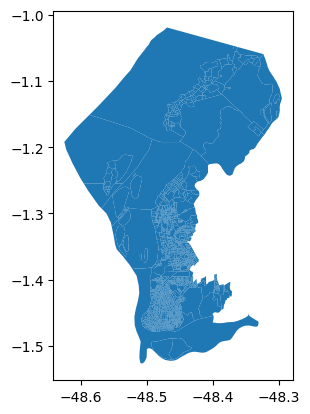

In [58]:
test = gpd.read_file('../data/output/PA_Belém_processed.gpkg')

display(test.head(3))
test.plot()

In [59]:
state = 'AC'
region = 'Vale do Acre'

format_city(state, region)

Processing the data...
Processing the city of Acrelândia...
Saving the files...
Processing the city of Assis Brasil...
Saving the files...
Processing the city of Brasiléia...
Saving the files...
Processing the city of Bujari...
Saving the files...
Processing the city of Capixaba...
Saving the files...
Processing the city of Epitaciolândia...
Saving the files...
Processing the city of Manoel Urbano...
Saving the files...
Processing the city of Plácido de Castro...
Saving the files...
Processing the city of Rio Branco...
Saving the files...
Processing the city of Santa Rosa do Purus...
Saving the files...
Processing the city of Senador Guiomard...
Saving the files...
Processing the city of Sena Madureira...
Saving the files...
Processing the city of Xapuri...
Saving the files...
Processing the city of Porto Acre...
Saving the files...
